# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

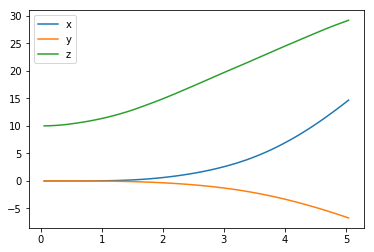

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

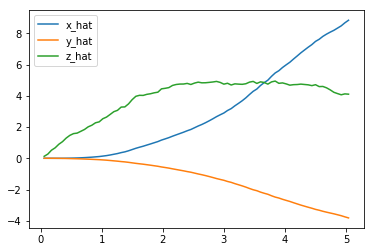

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

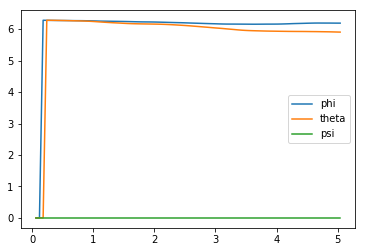

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

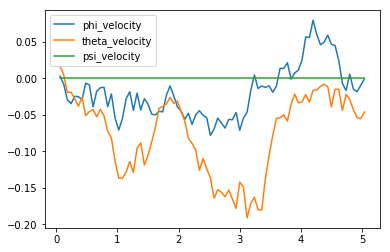

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

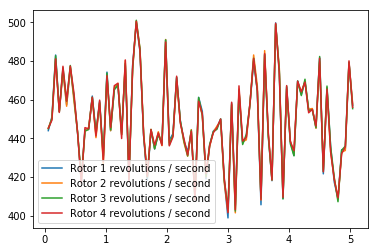

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ 14.67550006  -6.71473328  29.18538506   6.19098546   5.90591955   0.        ]
[ 8.8320518  -3.81608424  4.10092495]
[-0.00074723 -0.0460556   0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.300 (best =  -0.018), noise_scale = 3.255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [36]:
## TODO: Train your agent here.
from agents.policy_search import PolicySearch_Agent
from agents.agent import DDPGAgent
import sys
import pandas as pd
from task import Task, TaskTakeOff 

num_episodes = 1000 #1000

task_new = TaskTakeOff()
agent_new = DDPGAgent(task_new) 
labels = ['episode','score', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

#
for i_episode in range(1, num_episodes+1):
    state = agent_new.reset_episode() # start a new episode
    while True:
        action = agent_new.act(state) 
        next_state, reward, done = task_new.step(action)
        agent_new.step(action, reward, next_state, done) #(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent_new.score, agent_new.best_score, agent_new.noise), end="")  # [debug]
            to_write = [i_episode, agent_new.score] + \
                          list(task_new.sim.pose) + list(task_new.sim.v) +list(task_new.sim.angular_v) + list(action)
            for ii in range(len(labels)):
                results[labels[ii]].append(to_write[ii])
            break
    sys.stdout.flush()

print("\n...")
memory = agent_new.get_memory() #the deque object which contains the memory that we shall be plotting from.


Episode = 1000, score =   3.000 (best =   3.000), noise_scale = <DDGP.OUNoise object at 0x7efd1934a390>
...


## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

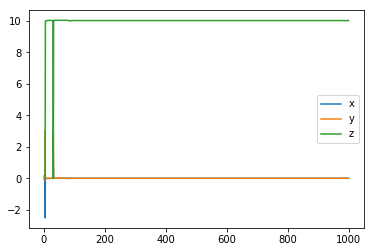

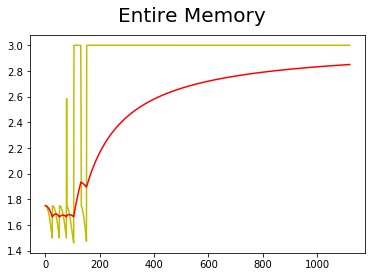

In [53]:
## TODO: Plot the rewards.
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['x'], label='x')
plt.plot(results['episode'], results['y'], label='y')
plt.plot(results['episode'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

#plot scores & cumsumavg 
cumsumavg, scores = [0], []
N = 1
for rec in memory:
    score = rec[2]
    scores.append(score) #list containing raw scores/rewards from memory
    cumsumavg.append( (((cumsumavg[-1] * (N-1)) + score) / N) ) #cumulative averages of scores to smoothen graph
    N+=1
cumsumavg = cumsumavg[1:]#drop the first 0 in cumsumavg

#plot of the entire recorded memory
fig = plt.figure()
fig.suptitle('Entire Memory', fontsize=20)
ax = fig.add_subplot(1, 1, 1)
ax.plot(scores, 'y', cumsumavg, 'r')
print("\n")





In [ ]:
#Please Ignore this box, I'm a bit paranoid of deleting these.
'''
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

#plot cumsumavg
cumsumavg, scores = [0], []
N = 1
for rec in memory:
    score = rec[2]
    scores.append(score) #list containing raw scores/rewards from memory
    cumsumavg.append( (((cumsumavg[-1] * (N-1)) + score) / N) ) #cumulative averages of scores to smoothen graph
    N+=1
cumsumavg = cumsumavg[1:]#drop the first 0 in cumsumavg

#plot of the entire recorded memory
fig = plt.figure()
fig.suptitle('Entire Memory', fontsize=20)
ax = fig.add_subplot(1, 1, 1)
ax.plot(scores, 'y', cumsumavg, 'r')
print("\n")

#plot of the first 5% of recorded memory
#to focus on the initial and most volatile stage of the learning process.
fig2 = plt.figure()
fig2.suptitle('First 5 percent of  Memory', fontsize=20)
ax2 = fig2.add_subplot(1, 1, 1)
ax2.plot(scores[:int(len(scores)/20)], 'y', cumsumavg[:int(len(cumsumavg)/20)], 'r')

'''


## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: My task s a simple takeoff. My reward function is given below: I find get_reward_basic() to be the best.

In [ ]:
#in task.TaskTakeOff class
def get_reward_basic(self):
        """Uses current pose of sim to return reward."""
        #indices# X=0, Y=1, Z=2, PSI=3, THETA=4, PHI=5
        X = self.sim.pose[0]
        Y = self.sim.pose[1]
        Z = self.sim.pose[2]
        PSI   = self.sim.pose[3]
        THETA = self.sim.pose[4]
        PHI   = self.sim.pose[5] 
        #set rewards
        #positive reward for positive Z, penalties for X & Y motion
        #Euler angles and velocities are neglected as their effects 
        #will reflect upon the (x,y,z) coordinates anyway and will then be 
        #followed through.
        reward =  0.0 + 1*(Z) - 0.3*(abs(X)+abs(Y))
        #End episode if max height is breached 
        done = False
        if self.sim.pose[2] >= self.target_pos[2]: # agent has crossed the target height
            #raise TypeError
            reward += 50.0  # bonus reward
            done = True
        #normalize reward to avoid overflows in other computations such as gradients
        #Since we will end an episode once it reaches a height of 10, and give it a bonus reward of 50
        #the max positice reward is 60:
        #  as (0,0,10) -> reward calculated above of 10 + 50 as bonus
        #to normalize we will consider the min value to be -60 
        Z = (reward + 60) / (120) # Z = (value - min)/(max - min), here (max - min)=(60-(-60)) = 120 always
        reward = Z
        return reward, done
    
    get_reward = get_reward_basic  #switch to select the particular get_reward needed.
### End of Code Block ###

I tried two different functions, get_reward_basic() and get_reward_complex():
    get_reward_basic():: only takes into consideration the (x,y,z) coordinates as everything ultimately reflects 
    on those coordinates anyhow.
    get_reward_complex():: starts with a flat reward of 100 and gives penalties for movement along X and Y plane 
    and any non zero Euler angles.
    

I actually found get_reward_basic() to better, maybe its the penalties of perhaps having a distinct score 
for positive feedback and negative feedback. So I modified the get_reward_complex() as below:
However that did not yield satisfactory results (even after using 1500 episodes). 

In [ ]:
def get_reward_complex2(self):
        """Uses current pose of sim to return reward."""
        #indices of self.sim.pose --> X=0, Y=1, Z=2, PSI=3, THETA=4, PHI=5
        X = self.sim.pose[0]
        Y = self.sim.pose[1]
        Z = self.sim.pose[2]
        PSI   = self.sim.pose[3]
        THETA = self.sim.pose[4]
        PHI   = self.sim.pose[5] 
        body_velocity = self.sim.find_body_velocity()
        #print("body_velocity.type={}".format(type(body_velocity))
        #set rewards
        euler_angle_sum = abs(PSI)+abs(THETA)+abs(PHI)
        #positive reward for positive Z movement
        #penalty for movement along x and y planes
        reward =  0.0 + 1*(Z) - 0.3*(abs(X)+abs(Y))
        reward -= 0.5 * euler_angle_sum #penalty for euler angle movement
        return round(reward,2)

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: While I began by trying Monte Carlo, that was a wrong approach as this problem is a continuous space problem. In the end I have used the Deep Deterministic Policy Gradient, which is an example of an Actor-Critic algorithm. DDPG is off-policy and doesn't rely on a model of the operating space; it is a Deep Learning algorithm as it utilized techniques in common with Deep Q-Networks. These features make it ideal for continuous space application, which the problem is an example of and therefore DDPG is being utilized.
    The Replay Buffer is simply a collection of learning data tuples, from which samples are drawn in random to avoid drawing samples that are close to each other chronologically. This is to avoid unduely high correlations that may prevail among samples collected closely together in terms of time.  
    The DDPG Agent uses two different models, one for the local and another the target. This follows the Fixed Q Targets approach of seperating the parameters as those being constantly updated targets from the ones making target values. The tau value used is 0.01. 
    Ornstein–Uhlenbeck Noise is a process by which a Gaussian distribution is sampled, but it is ensured that consecutive samples are more likely to be closely placed in the parent distribution than to be far apart. This allows us to create a bit of noise that is nevertheless anchored together - as opposed to being completely random among the full range of choises possible, which would create highly erratic movements. 



[1]https://pemami4911.github.io/blog/2016/08/21/ddpg-rl.html

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: The agent initially fluctuated but reached its target and remained steady thereafter. There therefore was a relatively quick learning curve which once closed seems to have resulted in steady peformance. 

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: I was pretty stuck with this project, but it has been a great learning opportunity. It was fun trying to work on something 'real-world' as the physics behind this project and it opened my eyes to many applications of computer programming that I had only vaguely thought of before.

<b>NOTE: Structure of my project</b> <p></p>
        <p>Aside from the initially given files I have added:
            <ul style="list-style-type:disc">
                <li>1) DDGP.py - this file has all the class definitions for DDGP algorithm.</li> 
                <li>2) agents/agent.py - the DDGP agent.</li>
                <li>3) task.py has class TaskTakeOff defines as the new task for this project.</li>
            </ul>
        </p>